In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

In [3]:
results0 = np.loadtxt("time.txt")
results2 = np.loadtxt("infectd.txt")

results6 = np.loadtxt("days.txt")
results7 = np.loadtxt("cases.txt")

results10 = np.loadtxt("beta.txt")
results11 = np.loadtxt("kappa.txt")
results12 = np.loadtxt("Nf.txt")


results13 = np.loadtxt("R_sq.txt")
results14 = np.loadtxt("MAPE.txt")
results15 = np.loadtxt("EV.txt")
results16 = np.loadtxt("RMSE.txt")

mse_train_loss = np.loadtxt("mse_train_loss.txt")
rmse_train_loss = np.loadtxt("rmse_train_loss.txt")

In [4]:
# All have this shape

print(results0.shape)
print(results2.shape)

print(results6.shape)
print(results7.shape)

print(results10.shape)
print(results11.shape)
print(results12.shape)

print(results13.shape)
print(results14.shape)
print(results15.shape)
print(results16.shape)

(5, 160)
(5, 160)
(160,)
(160,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)


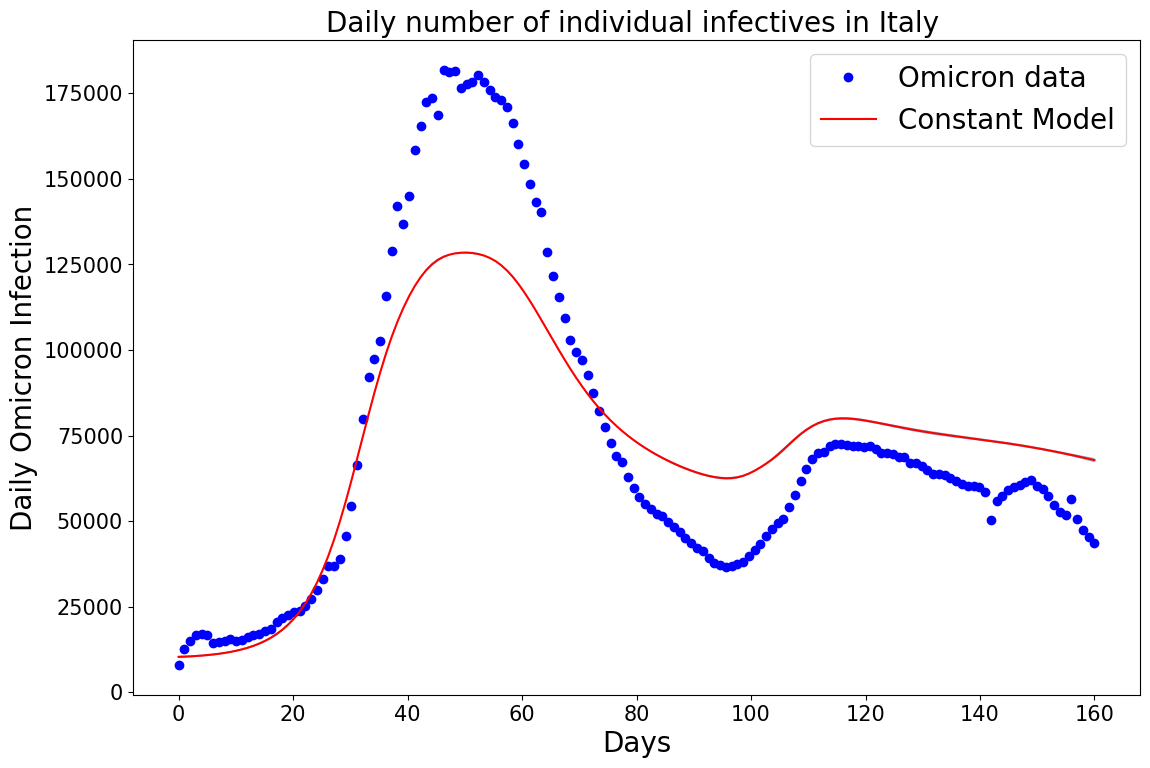

In [5]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Daily number of individual infectives in Italy ',fontsize = 20)
ax1.plot(results6,results7,'bo')
ax1.plot(results0[0,:],np.mean(results2,0),'r')
ax1.fill_between(results0[0,:],                 
 np.mean(results2,0)-(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 np.mean(results2,0)+(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 alpha=0.5)
#ax1.plot(first, second,color ='r')
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Daily Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Constant Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [6]:
# mean and std of the parameters

mean_beta = np.mean(results10)
mean_kappa = np.mean(results11)
mean_Nf = np.mean(results12)

mean_R_sq = np.mean(results13)
mean_MAPE = np.mean(results14)
mean_EV = np.mean(results15)
mean_RMSE = np.mean(results16)


std_beta = np.std(results10)
std_kappa = np.std(results11)
std_Nf = np.std(results12)


std_R_sq = np.std(results13)
std_MAPE = np.std(results14)
std_EV = np.std(results15)
std_RMSE = np.std(results16)

In [7]:
print(mean_beta)
print(mean_kappa)
print(np.min(results7) + (np.max(results7) - np.min(results7))*mean_Nf)

980.650964356
0.26012766200000004
86344.23700070665


In [8]:
print(mean_R_sq)
print(mean_MAPE)
print(mean_EV)
print(mean_RMSE)

0.8518281951535626
0.2450621784974382
0.7865611180289402
21897.059376213023


### Rational

In [9]:
T1R = np.loadtxt("timeR.txt")
I1R = np.loadtxt("infectdR.txt")
 
T0R = np.loadtxt("daysR.txt")
I0R = np.loadtxt("casesR.txt")
alphaR = np.loadtxt("alphaR.txt")

beta_valueR = np.loadtxt("betaR.txt")
kappa_valueR = np.loadtxt("kappaR.txt")
Nf_valueR = np.loadtxt("NfR.txt")
d_valueR = np.loadtxt("dR.txt")



R_sqR = np.loadtxt("R_sqR.txt")
MAPE_R = np.loadtxt("MAPE_R.txt")
EV_R = np.loadtxt("EV_R.txt")
RMSE_R = np.loadtxt("RMSE_R.txt")

mse_train_lossR = np.loadtxt("mse_train_lossR.txt")
rmse_train_lossR = np.loadtxt("rmse_train_lossR.txt")

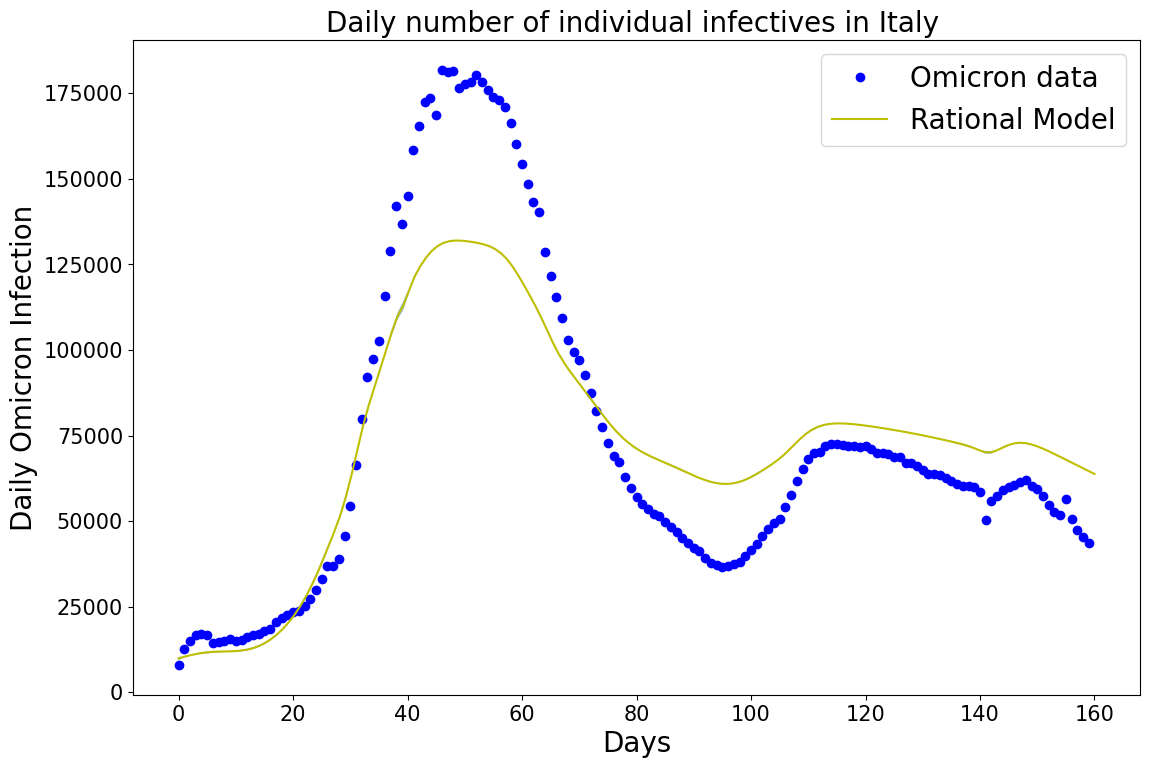

In [10]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Daily number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0R,I0R,'bo')
ax1.plot(T1R[0,:],np.mean(I1R,0),'y')
ax1.fill_between(T1R[0,:],                 
 np.mean(I1R,0)-(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 np.mean(I1R,0)+(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Daily Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Rational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)


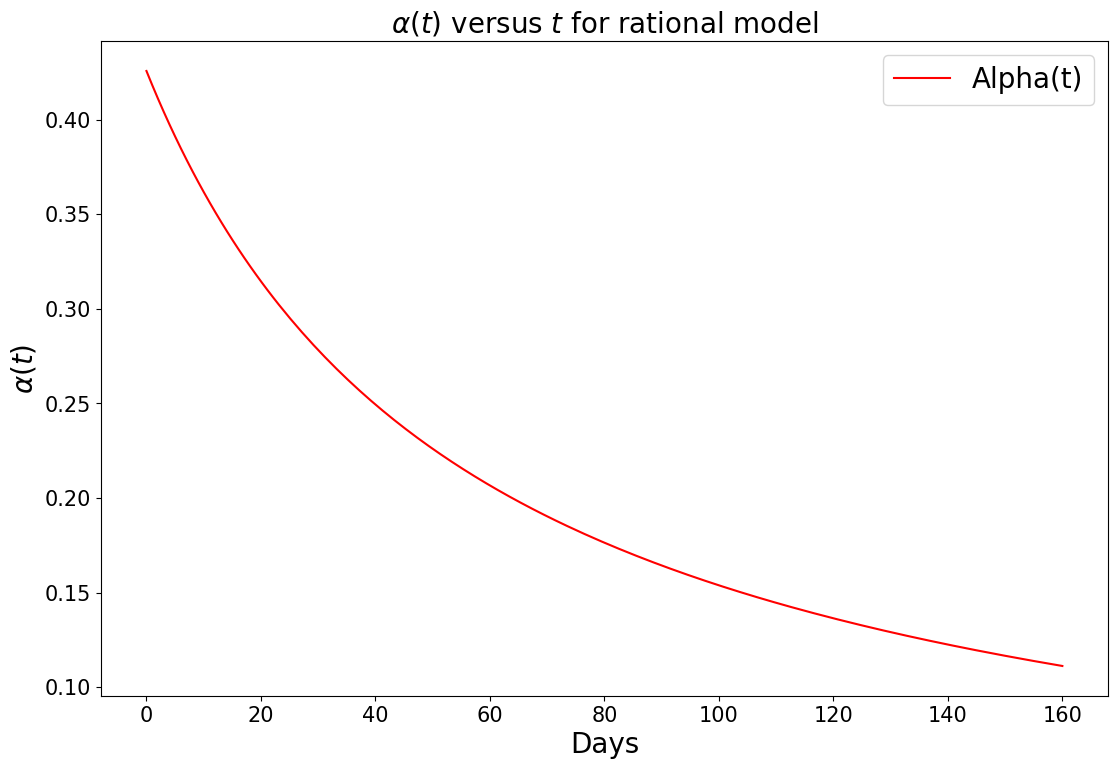

In [11]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for rational model',fontsize = 20)
ax1.plot(np.mean(T1R,0), np.mean(alphaR,0),'r')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [12]:
beta_valueR = np.mean(beta_valueR)
kappa_valueR = np.mean(kappa_valueR)
Nf_valueR = np.mean(Nf_valueR)
d_valueR  = np.mean(d_valueR )


mean_R_sqR = np.mean(R_sqR)
mean_MAPER = np.mean(MAPE_R)
mean_EVR = np.mean(EV_R)
mean_RMSER = np.mean(RMSE_R)

In [13]:
print(beta_valueR)
print(kappa_valueR)
print(d_valueR)
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueR)

7519.406542972001
24.117491912
0.01766887
84524.0833424484


In [14]:
print(mean_R_sqR)
print(mean_MAPER)
print(mean_EVR)
print(mean_RMSER)

0.881356395799331
0.23021230316181876
0.8150789832053645
20385.053789276026


### Birational

In [15]:
T1B = np.loadtxt("timeB.txt")
I1B = np.loadtxt("infectdB.txt")
 
T0B = np.loadtxt("daysB.txt")
I0B = np.loadtxt("casesB.txt")
alphaB = np.loadtxt("alphaB.txt")

beta_valueB = np.loadtxt("betaB.txt")
beta1_valueB = np.loadtxt("beta1B.txt")
kappa_valueB = np.loadtxt("kappaB.txt")
kappa1_valueB = np.loadtxt("kappa1B.txt")
c_valueB = np.loadtxt("cB.txt")
c1_valueB = np.loadtxt("c1B.txt")
d_valueB = np.loadtxt("dB.txt")
d1_valueB = np.loadtxt("d1B.txt")




R_sqB = np.loadtxt("R_sqB.txt")
MAPE_B = np.loadtxt("MAPE_B.txt")
EV_B = np.loadtxt("EV_B.txt")
RMSE_B = np.loadtxt("RMSE_B.txt")

mse_train_lossB = np.loadtxt("mse_train_lossB.txt")
rmse_train_lossB = np.loadtxt("rmse_train_lossB.txt")

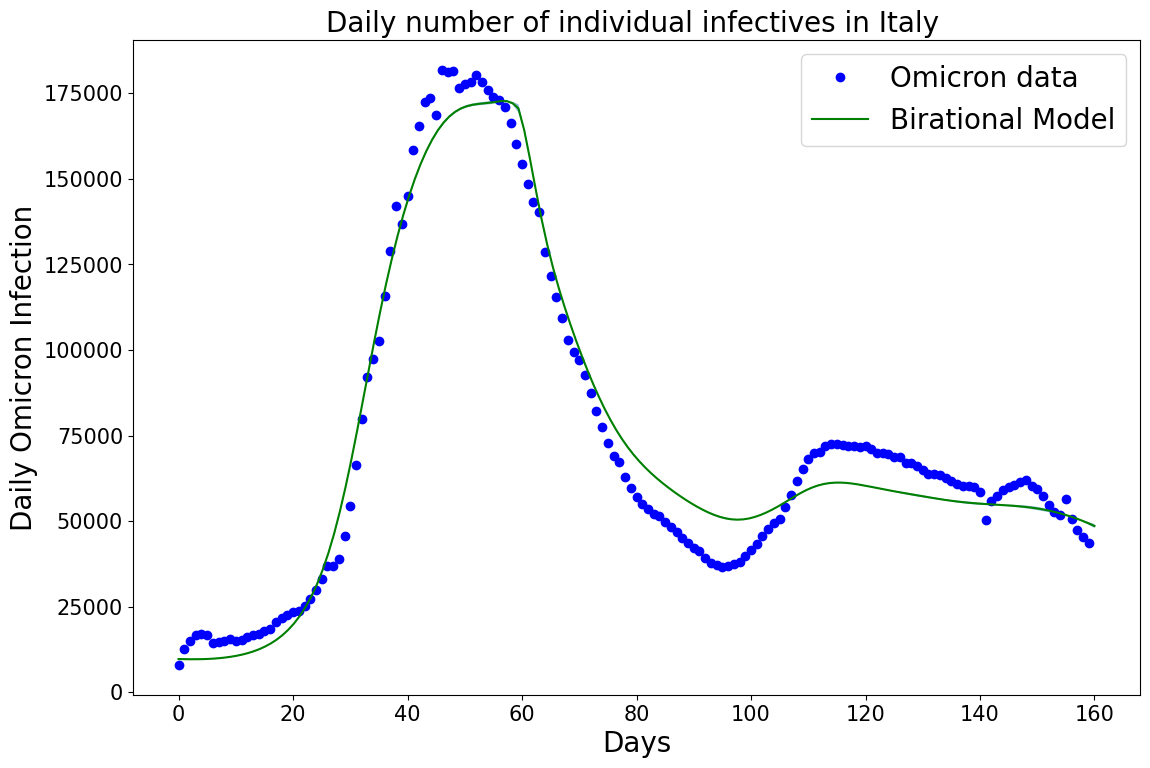

In [16]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Daily number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0B,I0B,'bo')
ax1.plot(T1B[0,:],np.mean(I1B,0),'g')
ax1.fill_between(T1B[0,:],                 
 np.mean(I1B,0)-(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 np.mean(I1B,0)+(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Daily Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Birational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)


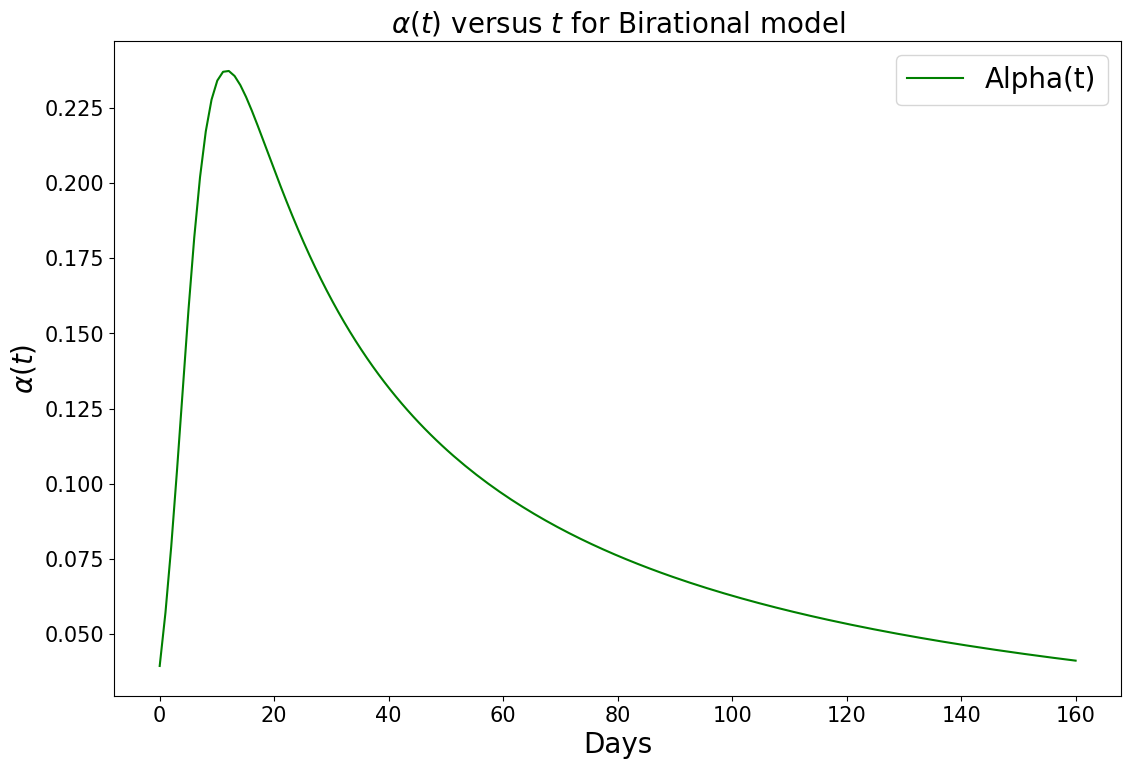

In [17]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for Birational model',fontsize = 20)
ax1.plot(np.mean(T1B,0), np.mean(alphaB,0),'g')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [18]:
beta_valueB = np.mean(beta_valueB)
beta1_valueB = np.mean(beta1_valueB)
kappa_valueB = np.mean(kappa_valueB)
kappa1_valueB = np.mean(kappa1_valueB)
c_valueB = np.mean(c_valueB)
c1_valueB = np.mean(c1_valueB)
d_valueB  = np.mean(d_valueB )
d1_valueB  = np.mean(d1_valueB )



mean_R_sqB = np.mean(R_sqB)
mean_MAPEB = np.mean(MAPE_B)
mean_EVB = np.mean(EV_B)
mean_RMSEB = np.mean(RMSE_B)


In [19]:
print(beta_valueB)
print(beta1_valueB)
print(kappa_valueB)
print(kappa1_valueB)
print(d_valueB)
print(d1_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c1_valueB)

5227.343359376
9519.062695311999
13.56105251
7.176206112
0.026959551999999998
0.07002403
175403.60772298332
-1859879.2539750594


In [20]:
print(mean_R_sqB)
print(mean_MAPEB)
print(mean_EVB)
print(mean_RMSEB)

0.9728496085458704
0.1376981314558131
0.9727965808893014
7833.974988610646


### Timeseries

In [21]:
T1A = np.loadtxt("timeA.txt")
I1A = np.loadtxt("infectdA.txt")
 
T0A = np.loadtxt("daysA.txt")
I0A = np.loadtxt("casesA.txt")
alphaA = np.loadtxt("alphaA.txt")

Nf_A = np.loadtxt("Nf_A.txt")


R_sqA = np.loadtxt("R_sqA.txt")
MAPE_A = np.loadtxt("MAPE_A.txt")
EV_A = np.loadtxt("EV_A.txt")
RMSE_A = np.loadtxt("RMSE_A.txt")

mse_train_lossA = np.loadtxt("mse_train_lossA.txt")
rmse_train_lossA = np.loadtxt("rmse_train_lossA.txt")


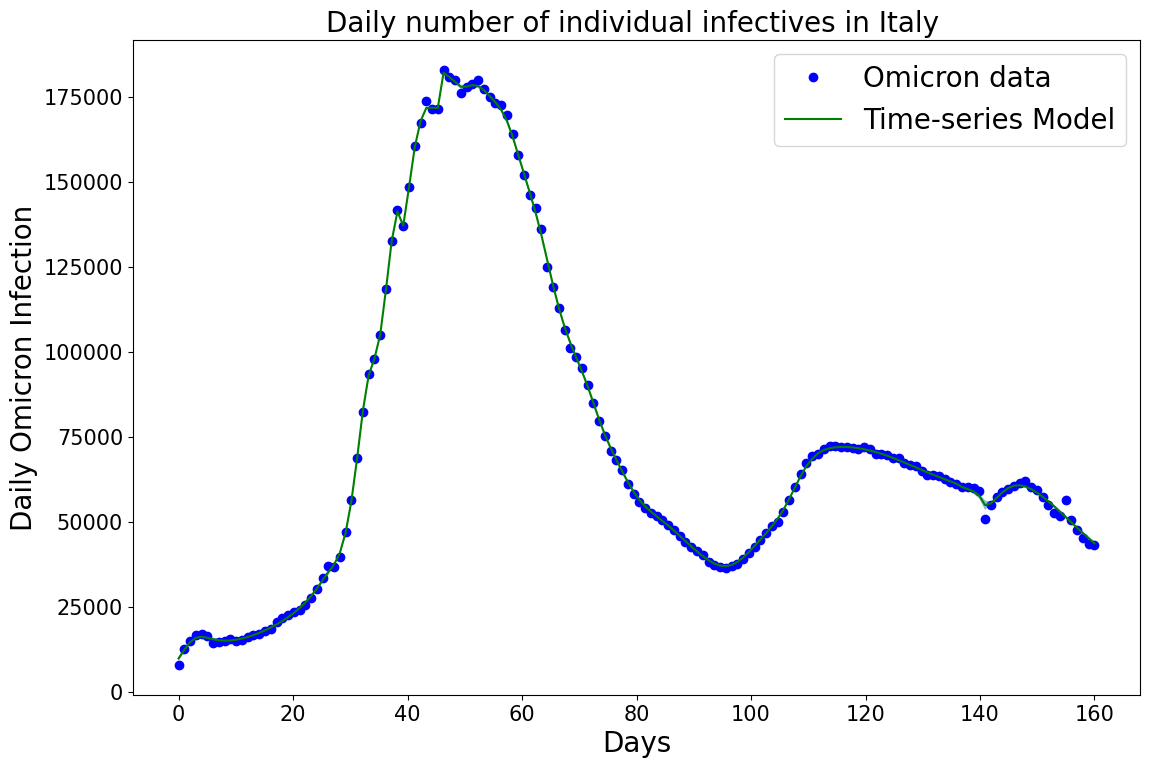

In [22]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title('Daily number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'g')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Daily Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Time-series Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

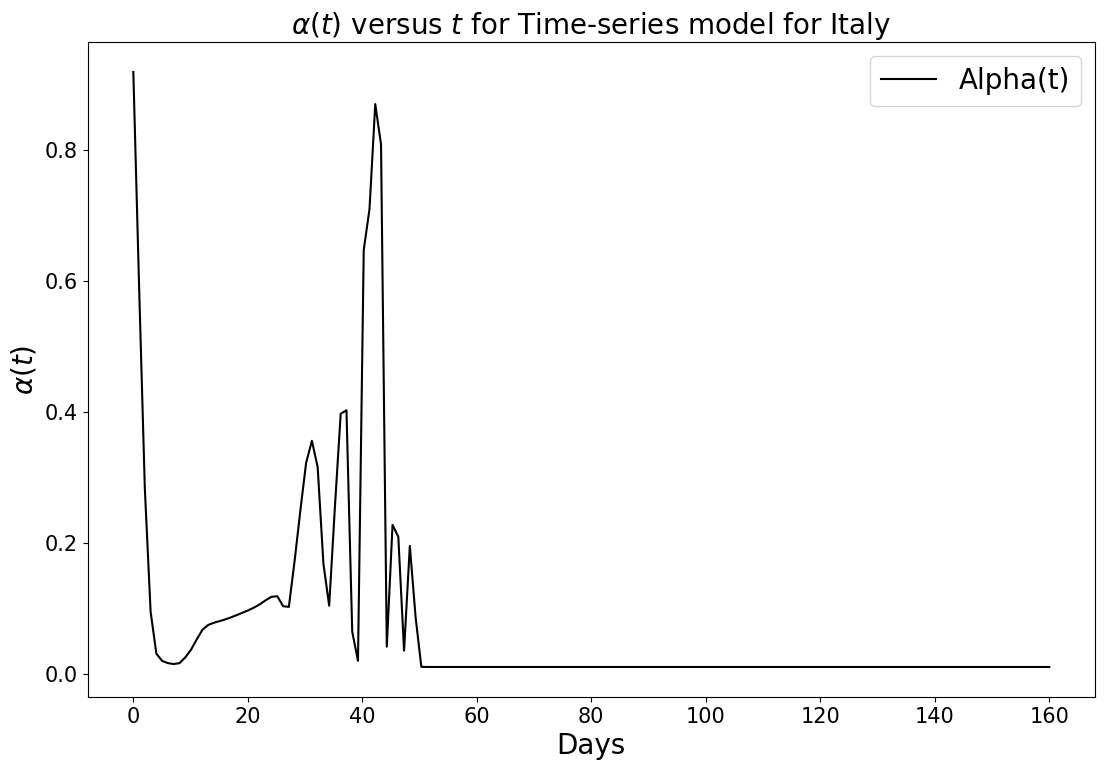

In [23]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for Time-series model for Italy',fontsize = 20)
ax1.plot(np.mean(T1A,0), np.mean(alphaA,0),'k')
ax1.legend(('Alpha(t)', 'Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [24]:
# mean and std of the parameters
 
Nf_valueA = np.mean(Nf_A)




mean_R_sqA = np.mean(R_sqA)
mean_MAPEA = np.mean(MAPE_A)
mean_EVA = np.mean(EV_A)
mean_RMSEA = np.mean(RMSE_A)

In [25]:
print(mean_R_sqA)
print(mean_MAPEA)
print(mean_EVA)
print(mean_RMSEA)
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueA)

0.9995508085872531
0.01606832677618545
0.9995353470499417
1035.0449539402812
175649.72572039932


In [26]:
from scipy.integrate import odeint

In [27]:
def function(I, t, alpha, Nf):
    dIdt = alpha*I*(1 - (I/Nf))
    return dIdt

In [58]:
np.mean(I1A,0)/(np.min(results7) + (np.max(results7) - np.min(results7)))

array([0.0542436 , 0.06832079, 0.08059656, 0.08769694, 0.08946022,
       0.08790129, 0.08547602, 0.08376987, 0.08316159, 0.08353047,
       0.08471649, 0.08660759, 0.08912519, 0.09220707, 0.09579964,
       0.09986222, 0.10437686, 0.10936006, 0.11487108, 0.12101604,
       0.12794377, 0.13583917, 0.14491059, 0.15536455, 0.16733922,
       0.1806791 , 0.19415083, 0.2063023 , 0.22524629, 0.257947  ,
       0.30901517, 0.37860771, 0.45558223, 0.51255971, 0.53948995,
       0.57815679, 0.6511027 , 0.73027153, 0.77774034, 0.75467341,
       0.81675426, 0.881625  , 0.92376492, 0.94522377, 0.94550406,
       0.94521997, 1.00214503, 0.99515453, 0.987694  , 0.97954283,
       0.97979673, 0.98233542, 0.98076521, 0.97405856, 0.96458946,
       0.95440594, 0.94228363, 0.92445444, 0.89882119, 0.86821363,
       0.83739001, 0.80732428, 0.77531059, 0.73893051, 0.69886474,
       0.65868453, 0.62219921, 0.59116755, 0.56509323, 0.54212922,
       0.51971149, 0.49531548, 0.46838032, 0.44118926, 0.41653

In [63]:
alpha = np.mean(alphaA,0)[93]
Nf = Nf_valueA
I_p = np.mean(I1A,0)[93]/(np.min(results7) + (np.max(results7) - np.min(results7)))
I_p

0.20799295665023998

In [64]:
tt = np.linspace(157,170)
I_PP = np.min(I0A) + (np.max(I0A) - np.min(I0A))*odeint(function, I_p, tt, args=(alpha, Nf))
tt1 =np.linspace(0,157)

In [65]:
I_PP[-1]

array([48235.27597091])

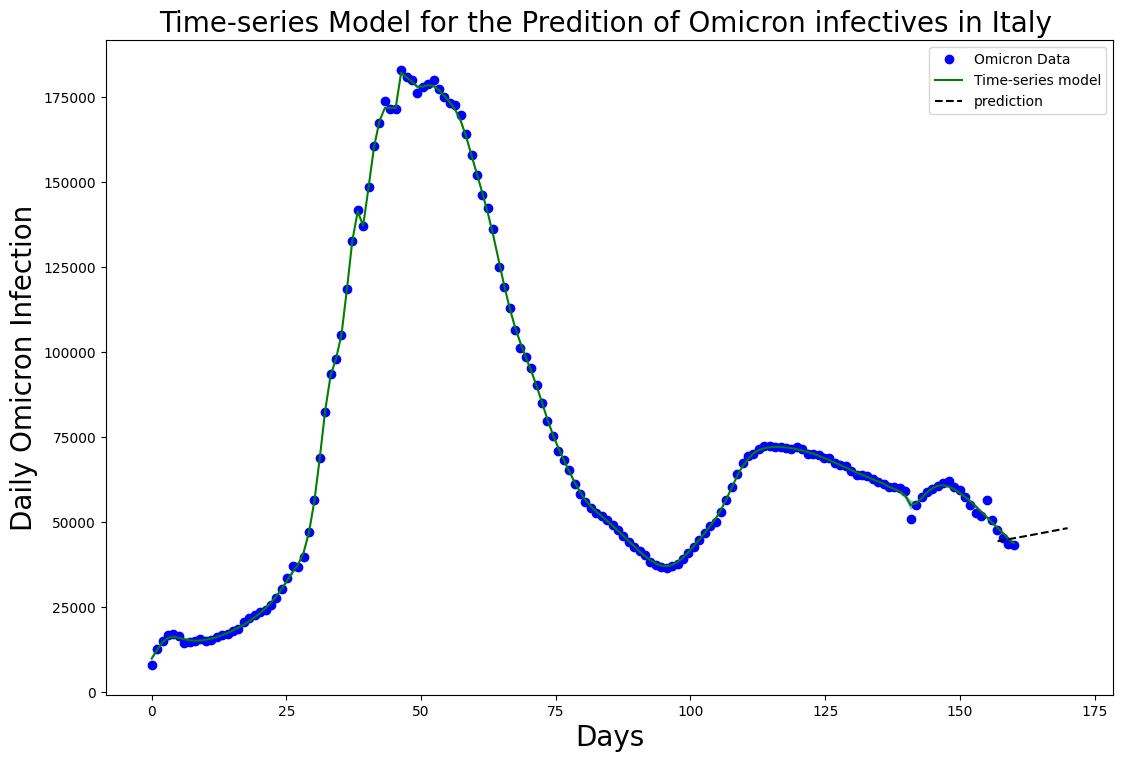

In [66]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Time-series Model for the Predition of Omicron infectives in Italy ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'g')
ax1.plot(tt, I_PP,'k--')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Daily Omicron Infection', fontsize = 20)
ax1.legend(('Omicron Data','Time-series model', 'prediction'),loc='best',fontsize = 10)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=10)